In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Both data sets are taken from the official Greek Statistics page ELSTAT https://www.statistics.gr/en/statistics/eco

In [2]:
wages = pd.read_excel('C:/Users/Andri/Python_Data/GR_WagesVsCPI/wages.xlsx')
CPI = pd.read_excel('C:/Users/Andri/Python_Data/GR_WagesVsCPI/CPI.xlsx')

Let's process the wage data first

In [3]:
wages.head()

,Year / Quarter,Unnamed: 1,Section B - Mining and Quarrying,Unnamed: 3,Unnamed: 4,Section C - Manufacturing,Unnamed: 6,Unnamed: 7,"Section D - Electricity, Gas, Steam and Air Conditioning Supply",Unnamed: 9,...,Unnamed: 25,Section J - Information and Communication,Unnamed: 27,Unnamed: 28,"Section M - Professional, Scientific and Technical Activities",Unnamed: 30,Unnamed: 31,Section N - Administrative and Support Service Activities,Unnamed: 33,Unnamed: 34
0,NaN,NaN,Index,Year-on-Year rate of change (%),Quarter-on-Quarter rate of change ...,Index,Year-on-Year rate of change (%),Quarter-on-Quarter rate of change ...,Index,Year-on-Year rate of change (%),...,Quarter-on-Quarter rate of change ...,Index,Year-on-Year rate of change (%),Quarter-on-Quarter rate of change ...,Index,Year-on-Year rate of change (%),Quarter-on-Quarter rate of change ...,Index,Year-on-Year rate of change (%),Quarter-on-Quarter rate of change ...
1,2010,Q1,177.365492,NaN,NaN,145.577211,NaN,NaN,240.317101,NaN,...,NaN,186.689715,NaN,NaN,190.368272,NaN,NaN,101.651273,NaN,NaN
2,NaN,Q2,183.116883,NaN,3.242678,149.625187,NaN,2.780639,235.334088,NaN,...,13.363029,169.40363,NaN,-9.259259,187.724268,NaN,-1.388889,111.614889,NaN,9.801762
3,NaN,Q3,184.230056,NaN,0.607903,144.827586,NaN,-3.206413,217.893545,NaN,...,3.634578,159.896283,NaN,-5.612245,176.770538,NaN,-5.83501,114.74951,NaN,2.808425
4,NaN,Q4,197.402597,NaN,7.15005,159.670165,NaN,10.248447,212.231031,NaN,...,-2.464455,175.45376,NaN,9.72973,200.566572,NaN,13.461538,119.787294,NaN,4.390244


What we need from here is the index of every sector and make the average index. For this, we're going to take only the index columns,

In [4]:
df=pd.DataFrame()
for i in wages.columns:
  if 'Index' in wages[i].values:
      df[i] = wages[i]

In [5]:
df.head()

,Section B - Mining and Quarrying,Section C - Manufacturing,"Section D - Electricity, Gas, Steam and Air Conditioning Supply","Section E - Water Supply, Sewerage, Waste Management and Remediation Activities",Section F - Construction,"Section G - Wholesale and Retal Trade, Repair of Motor Vehicles and Motorcycles",Section H - Transportation and Storage,Section I - Accommodation and Food Service Activities,Section J - Information and Communication,"Section M - Professional, Scientific and Technical Activities",Section N - Administrative and Support Service Activities
0,Index,Index,Index,Index,Index,Index,Index,Index,Index,Index,Index
1,177.365492,145.577211,240.317101,186.868687,176.99594,102.993767,126.113861,70.583612,186.689715,190.368272,101.651273
2,183.116883,149.625187,235.334088,177.272727,184.754172,115.419081,126.237624,80.01572,169.40363,187.724268,111.614889
3,184.230056,144.827586,217.893545,150.3367,177.89806,108.654138,115.222772,82.923954,159.896283,176.770538,114.74951
4,197.402597,159.670165,212.231031,158.922559,181.867388,118.941076,127.59901,80.88033,175.45376,200.566572,119.787294


Now, we don't need the word index, so we can drop the first row that contains it.

In [6]:
df.drop([0], axis=0, inplace=True)

Let's check what kind of data we have.

In [7]:
df.dtypes

Section B - Mining and Quarrying                                                            object
Section C - Manufacturing                                                                   object
Section D - Electricity, Gas, Steam and Air Conditioning Supply                             object
Section E - Water Supply, Sewerage, Waste Management and Remediation Activities             object
Section F - Construction                                                                    object
Section G - Wholesale and Retal Trade, Repair of Motor Vehicles and Motorcycles             object
Section H - Transportation and Storage                                                      object
Section I - Accommodation and                                   Food Service Activities     object
Section J - Information and Communication                                                   object
Section M - Professional, Scientific and              Technical Activities                  object
Section N 

Since we want to do calculations with the data, we'll change the type of the data to float.

In [8]:
df = df.iloc[:].applymap(float)
df.dtypes

Section B - Mining and Quarrying                                                            float64
Section C - Manufacturing                                                                   float64
Section D - Electricity, Gas, Steam and Air Conditioning Supply                             float64
Section E - Water Supply, Sewerage, Waste Management and Remediation Activities             float64
Section F - Construction                                                                    float64
Section G - Wholesale and Retal Trade, Repair of Motor Vehicles and Motorcycles             float64
Section H - Transportation and Storage                                                      float64
Section I - Accommodation and                                   Food Service Activities     float64
Section J - Information and Communication                                                   float64
Section M - Professional, Scientific and              Technical Activities                  float64


Now that we can do calculations with our data, we'll calculate the average wage index of all of the main sectors of the economy.

In [9]:
df['wage_index'] = df.mean(axis=1)
df.head()

,Section B - Mining and Quarrying,Section C - Manufacturing,"Section D - Electricity, Gas, Steam and Air Conditioning Supply","Section E - Water Supply, Sewerage, Waste Management and Remediation Activities",Section F - Construction,"Section G - Wholesale and Retal Trade, Repair of Motor Vehicles and Motorcycles",Section H - Transportation and Storage,Section I - Accommodation and Food Service Activities,Section J - Information and Communication,"Section M - Professional, Scientific and Technical Activities",Section N - Administrative and Support Service Activities,wage_index
1,177.365492,145.577211,240.317101,186.868687,176.995940,102.993767,126.113861,70.583612,186.689715,190.368272,101.651273,155.047721
2,183.116883,149.625187,235.334088,177.272727,184.754172,115.419081,126.237624,80.015720,169.403630,187.724268,111.614889,156.410752
3,184.230056,144.827586,217.893545,150.336700,177.898060,108.654138,115.222772,82.923954,159.896283,176.770538,114.749510,148.491195
4,197.402597,159.670165,212.231031,158.922559,181.867388,118.941076,127.599010,80.880330,175.453760,200.566572,119.787294,157.574707
5,185.528757,149.925037,226.443941,168.350168,180.378890,111.502016,123.793317,78.600904,172.860847,188.857413,111.950742,154.381094


Now, we will make proper time columns.

In [10]:
time = pd.concat([wages['Unnamed: 1'], wages['Year / Quarter']], axis=1)
time.head()

,Unnamed: 1,Year / Quarter
0,NaN,NaN
1,Q1,2010
2,Q2,NaN
3,Q3,NaN
4,Q4,NaN


Now we will put a the timeframe along with the average wage index, thus, we'll have the average wage index over time.

In [11]:
time = time.rename(columns={'Year / Quarter': 'Year', 'Unnamed: 1': 'Quarter'})
time.drop([0], axis=0, inplace = True)
wage_index = time
wage_index['wage_index'] = df['wage_index']
wage_index.head()

,Quarter,Year,wage_index
1,Q1,2010,155.047721
2,Q2,NaN,156.410752
3,Q3,NaN,148.491195
4,Q4,NaN,157.574707
5,NaN,Annual Average,154.381094


In order to eliminate the NaNs without interfering with our data, we'll replace them with the year where their quarter belongs.

In [12]:
for i in np.arange(0, len(wage_index), 5):
    x = i + 5
    for j in np.arange(i, x, 1):
        if j < 0:
            break
        if wage_index.iloc[j]['Year'] == 'Annual Average':
            break
        if j%5 != 0:
            wage_index['Year'].iloc[j] = wage_index.iloc[i]['Year']

wage_index.head(10)

C:\Users\andri\AppData\Local\Temp\ipykernel_11532\725712214.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage_index['Year'].iloc[j] = wage_index.iloc[i]['Year']


,Quarter,Year,wage_index
1,Q1,2010,155.047721
2,Q2,2010,156.410752
3,Q3,2010,148.491195
4,Q4,2010,157.574707
5,NaN,Annual Average,154.381094
6,Q1,2011,139.620145
7,Q2,2011,144.500539
8,Q3,2011,137.061511
9,Q4,2011,148.568762
10,NaN,Annual Average,142.437739


In order to have cleaner data, we need to seperate the annual average from the rest of the data

In [13]:
wage_average = wage_index.loc[wage_index['Year'] == 'Annual Average']
wage_average.drop(columns = ['Year', 'Quarter'], inplace=True)
wage_average.head()

C:\Users\andri\AppData\Local\Temp\ipykernel_11532\1333315014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage_average.drop(columns = ['Year', 'Quarter'], inplace=True)


,wage_index
5,154.381094
10,142.437739
15,121.365798
20,105.941787
25,104.211293


As we can notice, the index isn't quite right. We'll fix the average wage index along with the CPI since we'll ecounter the same problem. For now, let's fix the index of the main wage data and remove the annual average.

In [14]:
wage_index = wage_index.loc[wage_index['Year'] != 'Annual Average']
wage_index.index = np.arange(0, wage_index.shape[0])

Now, let's check CPI

In [15]:
CPI

,Unnamed: 0,2 0 1 0,Unnamed: 2,2 0 1 1,Unnamed: 4,2 0 1 2,Unnamed: 6,2 0 1 3,Unnamed: 8,2 0 1 4,...,2 0 1 7,Unnamed: 16,2 0 1 8,Unnamed: 18,2 0 1 9,Unnamed: 20,2 0 2 0,Unnamed: 22,2 0 2 1,Unnamed: 24
0,Month,Index,Rate of change,Index,Rate of change,Index,Rate of change,Index,Rate of change,Index,...,Index,Rate of change,Index,Rate of change,Index,Rate of change,Index,Rate of change,Index,Rate of change
1,1,95.832383,0.023771,100.816249,0.052006,103.155088,0.023199,103.368129,0.002065,101.848335,...,99.371932,0.011605,99.197729,-0.001753,99.633155,0.004389,100.493161,0.008632,98.519355,-0.019641
2,2,95.322187,0.027702,99.504707,0.043878,101.59259,0.020983,101.662718,0.00069,100.494011,...,99.088461,0.013004,99.147414,0.000595,99.762373,0.006202,99.991152,0.002293,98.722872,-0.012684
3,3,98.323224,0.039326,102.747656,0.044999,104.468756,0.016751,104.251481,-0.00208,102.846242,...,100.864098,0.017459,100.628314,-0.002338,101.577263,0.00943,101.573429,-0.000038,99.910763,-0.016369
4,4,99.480562,0.048402,103.388618,0.039285,105.356132,0.01903,104.729516,-0.005948,103.318232,...,101.508636,0.016418,101.546429,0.000372,102.58252,0.010203,101.110033,-0.014354,100.819348,-0.002875
5,5,100.274774,0.054273,103.573262,0.032894,105.014139,0.013912,104.544744,-0.00447,102.495798,...,100.607496,0.01193,101.216936,0.006058,101.446977,0.002273,100.288282,-0.011422,100.425331,0.001367
6,6,100.011465,0.052219,103.350642,0.033388,104.696933,0.013026,104.29487,-0.00384,103.156225,...,101.232625,0.01016,102.216215,0.009716,101.93218,-0.002779,100.332615,-0.015692,101.36441,0.010284
7,7,99.531923,0.054933,101.918714,0.02398,103.283333,0.013389,102.570465,-0.006902,101.872814,...,99.546805,0.009995,100.394896,0.00852,100.441677,0.000466,98.625085,-0.018086,99.957605,0.013511
8,8,98.841037,0.055369,100.490497,0.016688,102.240314,0.017413,100.933559,-0.012781,100.634184,...,99.102252,0.008924,100.063586,0.0097,99.89312,-0.001704,97.986551,-0.019086,99.827284,0.018786
9,9,100.744092,0.055708,103.820407,0.030536,104.759495,0.009045,103.586129,-0.011201,102.716071,...,100.976009,0.010046,102.077083,0.010904,102.001108,-0.000744,99.979282,-0.019822,102.190627,0.022118


As with the wages, we'll take only the index columns.

In [16]:
df=pd.DataFrame()
for i in CPI.columns:
  if 'Index' in CPI[i].values:
      df[i] = CPI[i]

As we can see from our data, the annual average is on the last row, so we can simply take it without much noise.

In [17]:
cpi_average = df.iloc[-1]

Now, we'll first fix the index of the cpi and wage average and then unite them to a dataframe.

In [18]:
cpi_average.index = np.arange(2010, 2022)
wage_average.index = np.arange(2010, 2022)

In [19]:
Annual_Average = pd.concat([wage_average, cpi_average], axis=1)
Annual_Average.columns = ['Wage_Annual_Index', 'Cpi_Annual_Index']
Annual_Average.head()

,Wage_Annual_Index,Cpi_Annual_Index
2010,154.381094,99.327443
2011,142.437739,102.634918
2012,121.365798,104.176002
2013,105.941787,103.216258
2014,104.211293,101.86181


Now, let's drop the first row that contains the index word and also the last one that contains the annual average.

In [20]:
df.drop([0, 13], axis=0, inplace=True)
df.head()

,2 0 1 0,2 0 1 1,2 0 1 2,2 0 1 3,2 0 1 4,2 0 1 5,2 0 1 6,2 0 1 7,2 0 1 8,2 0 1 9,2 0 2 0,2 0 2 1
1,95.832383,100.816249,103.155088,103.368129,101.848335,98.958931,98.231943,99.371932,99.197729,99.633155,100.493161,98.519355
2,95.322187,99.504707,101.59259,101.662718,100.494011,98.323644,97.816464,99.088461,99.147414,99.762373,99.991152,98.722872
3,98.323224,102.747656,104.468756,104.251481,102.846242,100.643535,99.133342,100.864098,100.628314,101.577263,101.573429,99.910763
4,99.480562,103.388618,105.356132,104.729516,103.318232,101.141494,99.86896,101.508636,101.546429,102.58252,101.110033,100.819348
5,100.274774,103.573262,105.014139,104.544744,102.495798,100.293099,99.421433,100.607496,101.216936,101.446977,100.288282,100.425331


Now what remains is to convert the CPI data table just as the wage data table, unite them, fix the index and we're ready for data visualization and intepretation

In [21]:
lista = []
for i in df.columns:
    for j in df[i].index:
        if j % 3 == 0: 
            lista.append(df[i][j])
cpi_quarters = pd.Series(lista, dtype=np.float)           
cpi_vs_wages = pd.concat([cpi_quarters, wage_index], axis=1)
cpi_vs_wages.head()

C:\Users\andri\AppData\Local\Temp\ipykernel_11532\657921473.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cpi_quarters = pd.Series(lista, dtype=np.float)


,0,Quarter,Year,wage_index
0,98.323224,Q1,2010,155.047721
1,100.011465,Q2,2010,156.410752
2,100.744092,Q3,2010,148.491195
3,101.538178,Q4,2010,157.574707
4,102.747656,Q1,2011,139.620145


In [22]:
cpi_vs_wages = cpi_vs_wages.iloc[:].applymap(str)
cpi_vs_wages['Date'] = cpi_vs_wages['Year'] + cpi_vs_wages['Quarter']
cpi_vs_wages.head()

,0,Quarter,Year,wage_index,Date
0,98.32322437514047,Q1,2010,155.04772102250502,2010Q1
1,100.01146474563805,Q2,2010,156.4107519580509,2010Q2
2,100.74409155564676,Q3,2010,148.49119481758441,2010Q3
3,101.53817756759919,Q4,2010,157.57470743942892,2010Q4
4,102.747655973429,Q1,2011,139.62014469011558,2011Q1


In [23]:
cpi_vs_wages.index = cpi_vs_wages['Date']
cpi_vs_wages.drop(columns=['Year', 'Quarter', 'Date'], axis=1, inplace=True)
cpi_vs_wages = cpi_vs_wages.iloc[:].applymap(float)
cpi_vs_wages.columns = ['CPI_Annual_Index','Wage_Annual_Index']
cpi_vs_wages.head()

,CPI_Annual_Index,Wage_Annual_Index
Date,,
2010Q1,98.323224,155.047721
2010Q2,100.011465,156.410752
2010Q3,100.744092,148.491195
2010Q4,101.538178,157.574707
2011Q1,102.747656,139.620145


Our data is all there and ready. We can begin the visualization process. For start. we'll plot the Annual Average.

<AxesSubplot:>

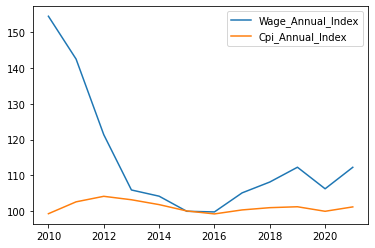

In [75]:
Annual_Average.plot()

Here we can clearly see the effects of the first memorandum that was imposed to Greece in 2010 and it included reducing the minimum wage and increasing taxes, including the sales tax. Although the CPI change until 2012 isn't that radical as the wage index, it's still a big increase. However, it falls right after the implementaition of the second memorandum in 2012 the fall of the wages stops being that radical in 2013. In 2015 where the thrid memorandum was signed, both the wage index and the CPI seem to stabilize and the wage index starts being above the CPI line again. There still is a fall between 2019 and 2020 despite the minimum wage being increased. In 2021 things seem to start f

Now let's see what the quarters have to say.

<AxesSubplot:xlabel='Date'>

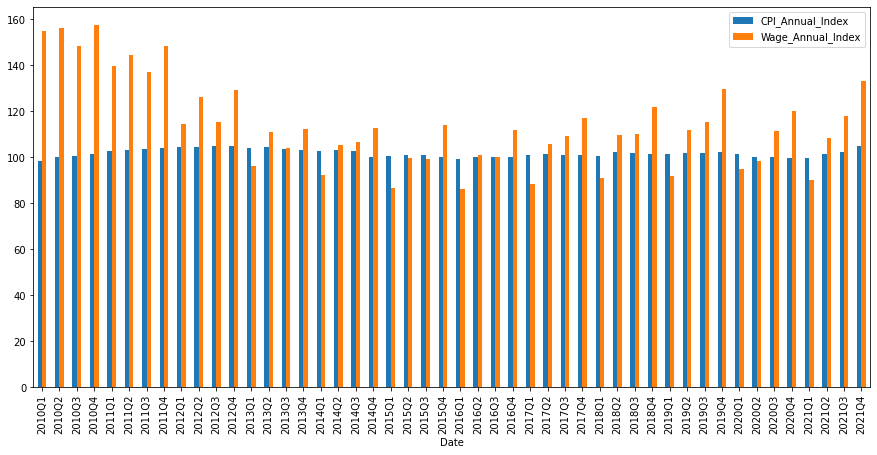

In [80]:
cpi_vs_wages.plot(kind='bar', figsize= (15, 7))

As we can see, the wages have lots of ups and downs compared to the CPI. We should note that this isn't a consistent curve going upwards or downwards because we're measuring the rate of growth that happened within each individual quarter, not the growth itself.